In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib_vol2 import lib2
from scipy import fftpack
import numpy.linalg as npl
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
gdal.UseExceptions()

ds_normal = gdal.Open(Tifpath1)
ds = gdal.Open(Tifpath)
ds_normal1 = np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())


ds_normal11 = ds_normal1[10:-10, 6:-31]
ds_norm1 = ds_band1[10: -10, 6:-31]/ds_normal11
ds_norm3 = ds_band3[10: -10, 6:-31]/ds_normal11
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt

<ipython-input-1-c36264069e27>:20: RuntimeWarning: invalid value encountered in true_divide
  ds_norm1 = ds_band1[10: -10, 6:-31]/ds_normal11
<ipython-input-1-c36264069e27>:21: RuntimeWarning: invalid value encountered in true_divide
  ds_norm3 = ds_band3[10: -10, 6:-31]/ds_normal11


/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:80: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10, label = "Period 1")
/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:82: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10, label = "Period 3")


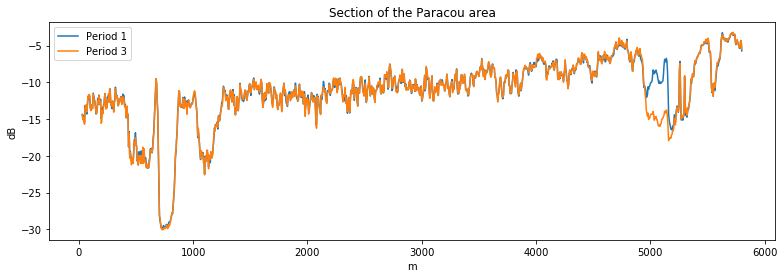

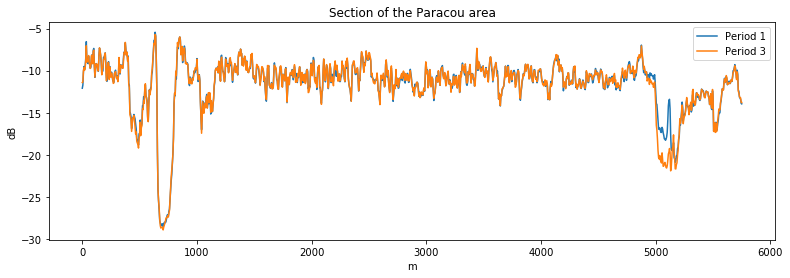

In [2]:
im1 = lib2(ds_band1)
im3 = lib2(ds_band3)
nim1 = lib2(ds_norm1)
nim3 = lib2(ds_norm3)
im1.plot_section(im3)
nim1.plot_section(nim3)

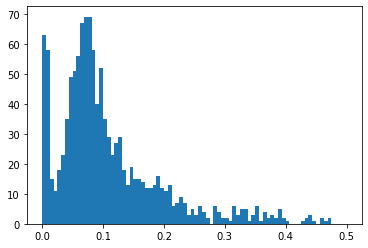

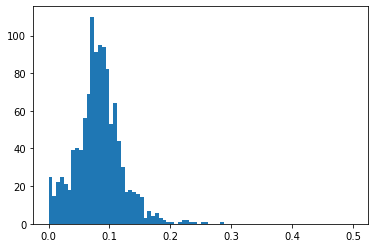

In [3]:
"""plt.hist(im1._image.ravel(), bins = 512, range = (0.01, 1.0))
plt.title("Histogram of band 1")
plt.show()
plt.title("Histogram of normalised band 1")
plt.hist(nim1._image.ravel(), bins = 512, range = (0.01, 1.0))
plt.show()"""
plt.hist(im1._ds_band, bins = 80, range = (0.0, 0.5))
plt.show()

plt.hist(nim1._ds_band, bins = 80, range = (0.0, 0.5))
plt.show()


/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:72: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(self._x, self._y, np.log10(self._image)*10, vmin = -40, vmax = 0)


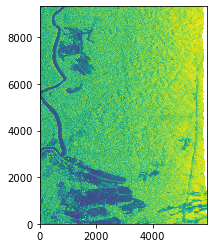

In [4]:
im1.plot_image()


/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


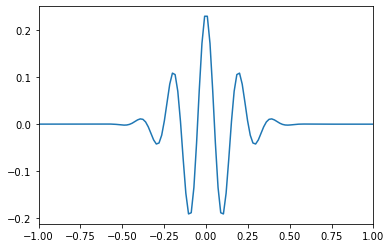

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


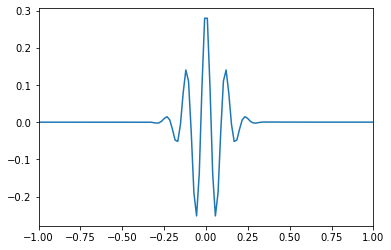

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


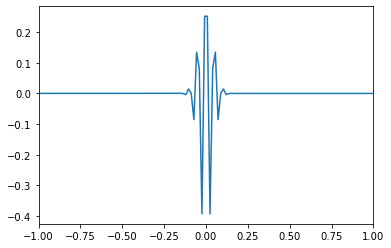

In [5]:
x = np.linspace(-4,4,500)
w1 = 10
w2 = 6
w3 = 2.5
m1 = morlet2(500,w1)
m2 = morlet2(500,w2)
m3 = morlet2(500,w3)

plt.plot(x,m1)
plt.xlim(-1,1)
plt.show()

plt.plot(x,m2)
plt.xlim(-1,1)

plt.show()
plt.plot(x,m3)
plt.xlim(-1,1)
plt.show()

/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:80: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10, label = "Period 1")
/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:82: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10, label = "Period 3")


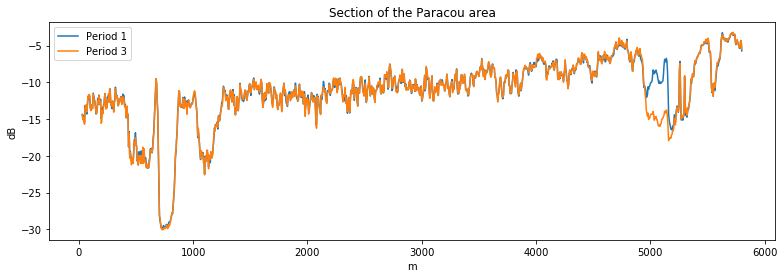

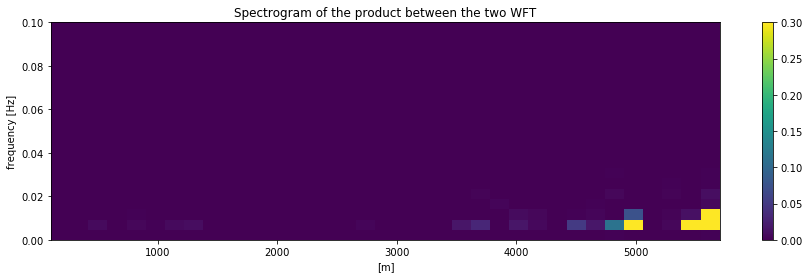

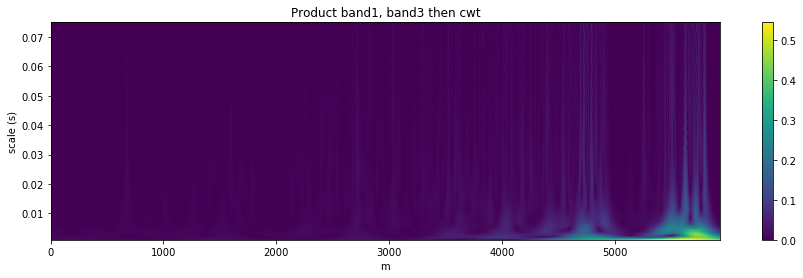

In [6]:
im1 = lib2(ds_band1)
im3 = lib2(ds_band3)
im1.spectrogram(n_win = 42,plot = False)
im3.spectrogram(n_win = 42, plot = False)
im1.plot_section(im3)
im1.cross_spectro(im3, prod = True, vmax = 0.3)
w = 2.5
sig_prod = im1._ds_band * im3._ds_band
cwt3 = im1.cwt(sig_prod, w)
im1.plot_cwt(cwt3, title = "Product band1, band3 then cwt")

## Forced deforestation and real deforstation,with or without shift, high resolution

In [7]:
sig = np.var(im1._ds_band)

/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:80: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10, label = "Period 1")
/home/wilhelm/INSA/4A/S2/CESBIO/lib_vol2.py:82: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10, label = "Period 3")


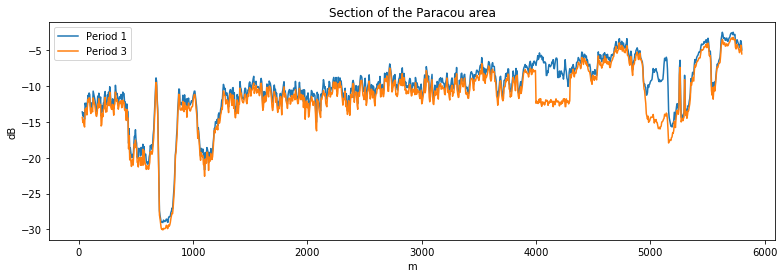

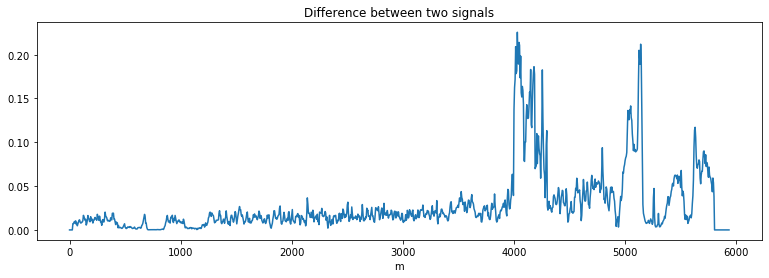

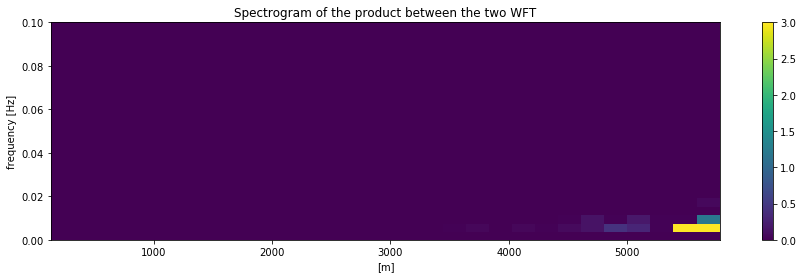

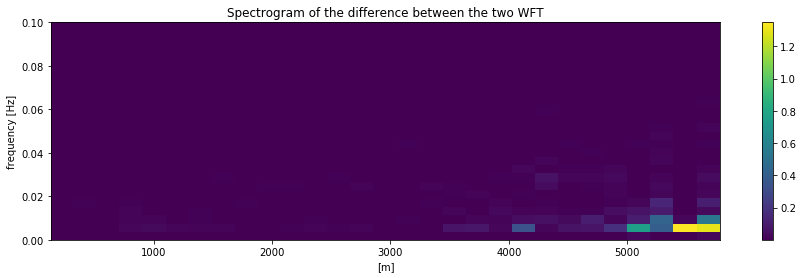

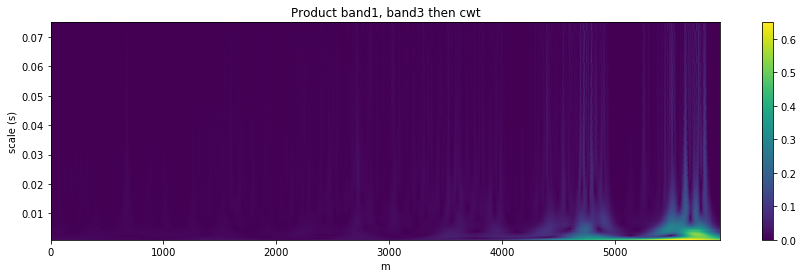

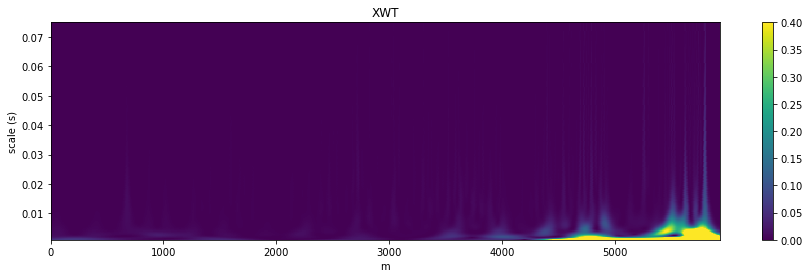

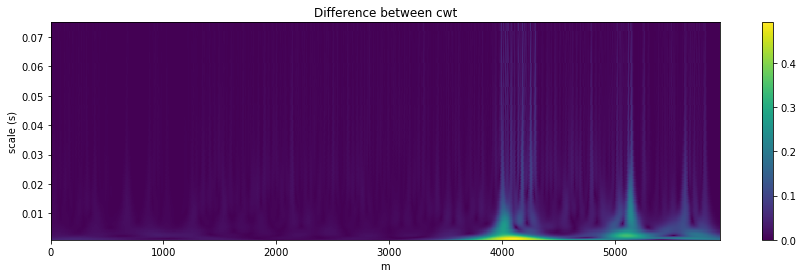

In [8]:


im3._ds_band = im3.simulate_deforestation_v2([4000,4300], mu = 0.06, sigma = sig/2)

im1._ds_band = im1.simulate_shift(s = 25)
im1.spectrogram(n_win = 52, plot = False)
im3.spectrogram(n_win = 52, plot = False)
diff_classique = np.abs(im1._ds_band - im3._ds_band)
im1.plot_section(im3)
im1.plot_signal(diff_classique, title = "Difference between two signals")

im1.cross_spectro(im3, prod = True)

im1.cross_spectro(im3, diff = True)


w = 2.5
sig_prod = im1._ds_band * im3._ds_band
#im1.plot_sections(sig_prod, im3._ds_band, label1 = "product between band1, band3", label2 = "band1")
cwt1 = im1.cwt(im1._ds_band, w)
cwt2 = im3.cwt(im3._ds_band, w)
cwt3 = im1.cwt(sig_prod, w)

dcwt = np.abs(cwt1-cwt2)
pcwt = np.abs(cwt1*np.conj(cwt2))
im1.plot_cwt(cwt3, title = "Product band1, band3 then cwt")
im1.plot_cwt(pcwt, title = "XWT", vmax = 0.4)

im1.plot_cwt(dcwt, title = "Difference between cwt")



## image normalisée

[0.06189823 0.06750475 0.09581021 ... 0.04566675 0.0408463  0.04033168]


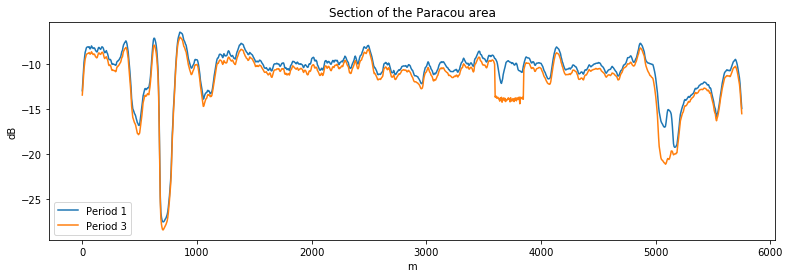

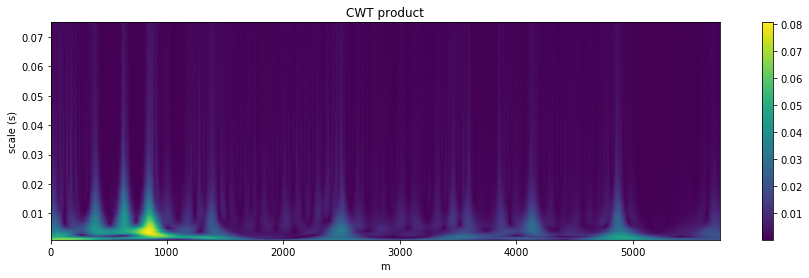

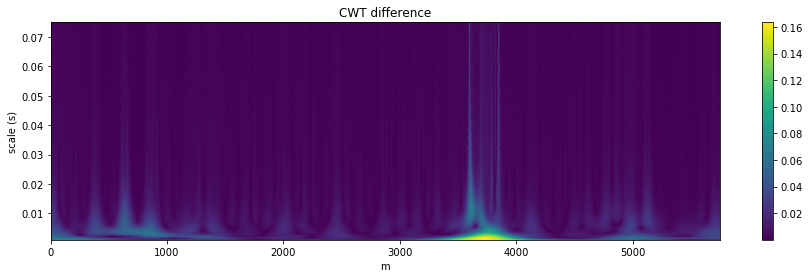

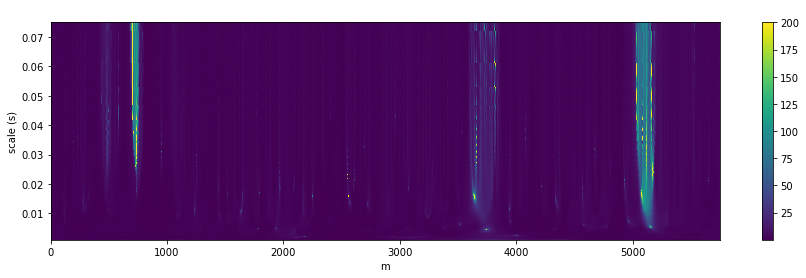

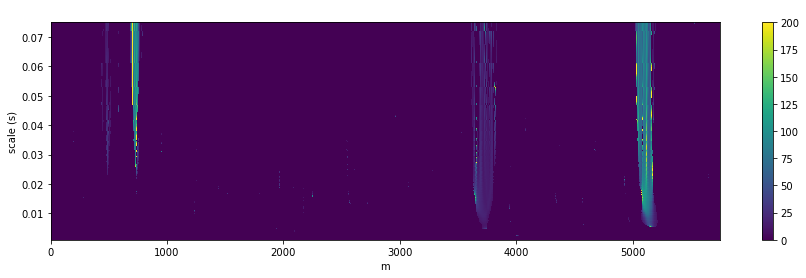

In [31]:
im1 = lib2(ds_norm1)
im3 = lib2(ds_norm3)
sig = np.var(im1._ds_band)
n = 20 // 2

print(im1._ds_band)
im1._ds_band = im1.decrease_resolution(im1._ds_band, n = n)
im3._ds_band = im3.decrease_resolution(im3._ds_band, n = n)

taille_pixel = im1._s # 5
n_pixel = 50
x = 3600  # 5600
location = [x, int(taille_pixel * n_pixel + x)]

im3._ds_band = im3.simulate_deforestation_v2(location, mu = 0.041, sigma = sig)

im1._ds_band = im1.simulate_shift(s = 150)
#im1.spectrogram(n_win = 52, plot = False)
#im3.spectrogram(n_win = 52, plot = False)
diff_classique = np.abs(im1._ds_band - im3._ds_band)
im1.plot_section(im3)
#im1.plot_signal(diff_classique, title = "Difference between two signals")

#im1.cross_spectro(im3, prod = True)

#im1.cross_spectro(im3, diff = True)


w = 2.5
sig_prod = im1._ds_band * im3._ds_band

#im1.plot_sections(sig_prod, im3._ds_band, label1 = "product between band1, band3", label2 = "band1")
cwt1 = im1.cwt(im1._ds_band, w)
cwt2 = im3.cwt(im3._ds_band, w)
eps = 1e-20
cwt3 = im1.cwt(sig_prod, w)
cwt4 = im1.cwt(diff_classique, w)
dcwt = np.abs(cwt1-cwt2)
pcwt = np.abs(cwt1*np.conj(cwt2))+eps
fac = cwt4/cwt3

im1.plot_cwt(cwt3, title = "CWT product")
#im1.plot_cwt(pcwt, title = "XWT", vmax = 0.08)
im1.plot_cwt(cwt4, title = "CWT difference")
im1.plot_cwt(fac,title = " ",vmax = 200)

#im1.plot_cwt(dcwt, title = "Difference between cwt")

fac[fac < 10] = 0
im1.plot_cwt(fac,title = " ",vmax = 200)
